In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [26]:
data = pd.read_csv("/Users/sharathg/Desktop/DataSets/goodbooks-10k/br.csv",encoding ='latin-1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
len(data[data.author =='J.K. Rowling'])


220

In [27]:
len(data[data.author=='Charles Dickens'])

267

In [28]:
data.columns

Index(['bookID', 'title', 'author', 'rating', 'ratingsCount', 'reviewsCount',
       'reviewerName', 'reviewerRatings', 'review', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22'],
      dtype='object')

*** We are dropping the unecessary columns to build a dataframe with the necessary columns ***

In [29]:
data1 = data[['bookID','title','author','review','rating','reviewerName']]

In [12]:
data1.info

<bound method DataFrame.info of         bookID                                              title  \
0            9  Unauthorized Harry Potter Book Seven News: "Ha...   
1            8  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
2            3              Harry Potter and the Sorcerer's Stone   
3            1  Harry Potter and the Half-Blood Prince (Harry ...   
4            2  Harry Potter and the Order of the Phoenix (Har...   
5            4  Harry Potter and the Chamber of Secrets (Harry...   
6            7   The Harry Potter Collection (Harry Potter, #1-6)   
7            5  Harry Potter and the Prisoner of Azkaban (Harr...   
8         8053                   Charlie Oink (Easy Peasy People)   
9            6  Harry Potter and the Goblet of Fire (Harry Pot...   
10        9643  My Country Right or Left: 1940-1943 (The Colle...   
11        9644                                        Why I Write   
12        7209  Bella Tuscany & Under the Tuscan Sun (2 Book Set)   
13

In [30]:
data1.isnull().sum()
# So we can see the total null values in our subset dataset here . 

bookID               0
title                2
author               2
review          183686
rating               2
reviewerName       543
dtype: int64

In [31]:
datan = data1.dropna()

In [32]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128387 entries, 2 to 312072
Data columns (total 6 columns):
bookID          128387 non-null object
title           128387 non-null object
author          128387 non-null object
review          128387 non-null object
rating          128387 non-null object
reviewerName    128387 non-null object
dtypes: object(6)
memory usage: 6.9+ MB


In [33]:
datan.isnull().sum()

bookID          0
title           0
author          0
review          0
rating          0
reviewerName    0
dtype: int64

In [17]:
# The above result shows that we have a clean dataset without any null values . 


In [34]:
datan.head()

,bookID,title,author,review,rating,reviewerName
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury)
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith


In [35]:
len(datan.review)
# We have 128387 reviews on book to play with . 

128387

**Splitting the data in to test and train datasets**


In [36]:
# nltk.download()

The best classifiers have around , 80% accuracy and we will try to be more efficient here and see what is up . 

In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [21]:
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()
# for sentences in train.review.values[:10]:
#     print(sentences)
#     ss = sid.polarity_scores(sentences)
#     print(ss)
#     for k in sorted(ss):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-21-64866deaa6ea>, line 8)

** There are some unicode values and some reviews in other languages , so before removing any stopwords and further analysis , we weed out the reviews not in english and other conversion errors using langdetect. **.


*** Here we are also trying feeding the unicode error values to check , if they are identified by the package as different language (This is a hack, we use to minimise extra work) . 


In [38]:
from langdetect import detect,detect_langs
detect('¯¬ôà¯¤ ôô_ ¯¤ôã¯¨¯±ôö¯Â ¯£ôö ¯¤¯±¯»¯ø¯¤¯Á ¯Çôö¯¬¯¤ôÜ ôÉ¯¤ôöôãôã¯_ôö¯Â¯© ¯¤ôã¯»ô_ ¯»¯_¯»ôÉô_ ¯¬¯¦ôã ¯¤ôã¯_ô_¯á¯© ¯¬¯_¯_¯¤¯ø¯© ôö¯»¯µôÉ¯» ôã¯£ô  ¯¤ôã¯_¯»¯¤¯» ¯_ô_¯¬ ¯µôö¯»ôà¯¤ ô_¯_ôãôä ¯_ôãôä ¯Âôö¯_ôà¯¤¯£ôö ¯»¯»¯_ôöôã ¯_ô_¯¤¯»ôà¯¤ ôã¯µ¯±¯¤¯¨ ô_ôöôÉô_ ôÉ¯_ ¯¤ôã¯_ôö¯Â ôö¯»¯µ¯¬¯_ ¯»ô_ôÉ¯© ôÉôÄ¯±¯±¯© ôô_ ¯£ôôã¯¤ôÉô ¯¤ ¯¤ôã¯_¯üô_ôÉ¯© ôãôÛ ¯¤ôãôöôãô_¯© ¯¤ôãô ôÄ¯øô_¯©ôãôãôÄ¯¤¯_ô  ¯¤ôã¯¡ô_ ô ¯µô ¯_ ôÉô ôà ¯¦¯_ô_¯© ôöôÉ¯Â¯±ôÉ¯¤ôÜ ôã¯£ô ôà ¯_¯¬¯± ¯¤ôã¯_¯µôö¯± ôãôÉ ô_¯Â¯ø ¯_¯øôã¯¤ôÜ ôöôã¯¤ ô ¯_¯¤ôà¯© ôôã¯Â¯£ ôãôã¯_ô_ôã¯© ôö¯¤ôã¯»¯¨¯¤¯¬¯Ç ôö¯¤ôã¯»ôÄô_ô ôÉ¯_ ¯¤ôã¯üôã¯¤ôÉ ôà¯¡¯¤ ôàôö ¯¤ôãôÄ¯¤¯_ô  ¯¤ôã¯¡ô_ ¯_ôÄôÉ ¯_ôãô_ôà ¯¬¯»ô¯»ô_¯» ¯±¯£¯_ôà ¯¬¯¤ôã¯_¯Â¯¤¯±¯© ôöôà¯¡¯¤ ôàôö ¯¤ôãôÉ¯Â¯»ôÉ¯_ ¯¤ôã¯¡ô_ ô_ô ¯¦¯_ ¯_ôô ¯¤ôÜ ¯¬¯«¯±ô_¯¤ôÜ ô_¯»ô¯±¯Â ¯_ôãôä ¯¤ôã¯üôãôÉ ôö¯¤ôã¯»¯Âô ô_ ôöô_¯«¯¤¯±ôÄ ôô_ôà ¯¬ôãôàô¯© ôöôã¯¡¯© ôö¯_¯«ô_¯©ô_¯«¯¤¯±ôÄ ¯¤ôã¯±¯Â¯¤ôã ôô_ ¯µô ¯_ ¯¤ôã¯£¯«ôã¯¤¯Á ôöôàôÉ ôÉôÉ¯»ôã¯_ôöô  ¯_ôàôö¯¤ôÜ ôö¯«¯_ôö¯±¯¤ôÜ ¯_ôÉô_ôâ¯¤ôÜ ¯¬¯¤ôã¯±ô¯_¯© ôö¯»¯«¯¤¯±ôÄ ¯¤ôãô ¯_¯¤¯Á ôô_ ¯»¯«ô_ô_¯_ ôâ¯á¯_¯© ¯¤ôãôã¯_ôÉ ¯¤ôã¯»ô_ ôã¯¤¯¬¯ø ôö¯£ô  ¯»¯øôÉôä ¯»ô ôô_¯_¯¤ôÜ ôãôàô  ¯_ô  ôÄôã ¯¤ôãôÄ¯¬¯» ôö¯¤ôã¯_¯±ôÉ¯¤ô  ôö¯¤ôã¯üôãôÉ ¯¤ôã¯¡ô_ ¯£¯µ¯¬¯_ ¯_¯¤¯ø¯© ô_ôöôÉô_¯©ôö¯»¯»¯_ôöôã ôâ¯±ô_¯© ôÉô  ¯¤ôã¯¬¯«¯± ¯´ôãôä ôÉ¯_¯»ô ôâ¯_ ¯¢¯øôÉô_ ô_ôô_¯¦ ¯¬¯±¯¤¯_¯_¯© ¯¤ôã¯øôÉ ¯¤ôãôÉ¯«¯¬¯_ ¯¬¯¦¯_ôÄ¯¤¯» ôö¯_¯«ô_¯© ôö ¯«¯_ôö¯± ¯_ôâô_¯± ¯¬¯¤ôã¯»¯«ôô_ôÉô  ¯£ô ¯¤ ôã¯£ôâô_ôÉ ¯¡ôãôÄ ¯£ô_ôà¯¤ ¯¤ôãôâ¯±¯¤¯Á ¯¤ôã¯£¯_¯_¯¤¯Á¯Ù')

'vi'

In [39]:
detect('¯¤¯_¯øôä ¯¤ôãôÉ¯¨¯áôöô¯¤¯» ôã¯øô_ôà¯¤ ¯_ôã¯¤ôâ¯© ôÉ¯_ ¯¤ôãôÄ¯¤¯»¯¬ ¯¤ôã¯_¯üô_ôÉ ôÉ¯¤¯±ôÄô_¯_ ôö¯áôã¯¬¯» ôÉô ôà ¯»¯£ôãô_ô ôÄ¯»¯¤¯¬ ¯_ô  ¯¤¯¨¯»¯á¯¤ôôà¯¤ ôàô_ ôö¯«ôâô_ôâ¯© ¯_ôö¯Âôà¯¤.ôÄ¯¤ô  ôÉô  ¯¤ôãôÉôÉôÄô  ¯¤ô  ô_ôÄôöô  ôÄ¯»¯¤¯¬¯¤ ¯_¯¤¯øô_¯¤ ôöôãôÄô  ¯¤ôÄ¯»¯«ô ¯¤ô  ¯ü¯±ôöô ¯¤¯¨¯»¯á¯¤ôôà¯¤ ôã¯¤ ô_ôÉôÄô  ô¯µôãôà¯¤ ¯_ô  ¯ü¯±ôöô ¯¤ôã¯¤¯¨¯»¯á¯¤ô¯¤¯» ¯¤ôã¯¤¯¨¯±ôä ôö¯¤ôã¯»ô_ ôÄ¯¤ô ¯» ôÉ¯ÂôÉôö¯_ôà¯¤ ¯_¯«¯±¯© ¯£¯«¯¨¯¤¯µ.ô_¯±ôÄ¯_ ¯¤ôãôÉ¯ü¯_ôãô ¯_ôãôä ¯ü¯±ôöô ¯¤ôã¯¤¯¨¯»¯á¯¤ô ôö¯¤ôãôÉ¯_¯¤ôÉôã¯© ¯¤ôã¯»ô_ ôÄ¯¤ô ¯» ô_¯»ôãôâ¯¤ôà¯¤ ¯¤ôãôÉ¯¨¯áôöôô_ô  ôÉ¯_ ¯¤ôã¯_¯±¯¤¯')

'vi'

**Since both the cases ,get detected as vietnamese ..we ca safely ignore them and carry on with further steps. **

In [40]:
from langdetect import detect,detect_langs
sum = 0 
alt_lan =0
for review in datan.review:
    if detect(review)=='en': 
        sum+=1
    else:
        alt_lan+=1

print(sum) 
print(alt_lan)
# detect_langs('teri maa ')

KeyboardInterrupt: 

*** there are total 9501 values in the data set that are classified as the ohter than english that include some unicode conversion/scraping errors ***

In [80]:
# en =[]
# alt_lan= []
# for review in test.review.head(5):
#     if detect(review)=='en': 
#        en.append(review.index)
#     else:
#         alt_lan.append(1)


## Writing a function that will detect the language of each review and give it in a new colum-
### 1. Defining the function that will be detect the language of review 
### 2. Applying it to the entire review column


In [41]:
##Function definition for detecting language 
def langRec(text):
    k=detect(text)
    return k 
     
        
   

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

In [43]:
##Function definition for  sentiment scores 
def sentimentA(text):
    snt = analyser.polarity_scores(text)
    return snt['compound']
    

In [44]:
gf = datan.head(5)
gf

,bookID,title,author,review,rating,reviewerName
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury)
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith


In [45]:
l = (sentimentA("This is shit ! wtf"))
l

-0.8268

In [68]:
gf['sentiment']= gf.review.apply(sentimentA)
gf

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705


In [46]:
langRec("How are you ")

'en'

In [56]:
gf = datan.head(5)
datan['rev_lang']= datan.review.apply(langRec)
gf

KeyboardInterrupt: 

## Detecting the language for the train set 

In [54]:
# datan['rev_lang']= datan.review.apply(langRec)
gf.rev_lang.unique()

array(['en'], dtype=object)

In [55]:
datan.rev_lang.unique()
#based on this converting the rev_lang to categorical column
datan['rev_lang']= datan['rev_lang'].astype('category')

AttributeError: 'DataFrame' object has no attribute 'rev_lang'

In [77]:
datan.dtypes


bookID            object
title             object
author            object
review            object
rating            object
reviewerName      object
rev_lang        category
dtype: object

#Getting the Sentiment of all the datan sets , in a new coulmn 

In [80]:
datan['sentiment']= datan.review.apply(sentimentA)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [275]:
len(datan)

128387

In [81]:
datan.head(1000)

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705
15,3731,Great Short Works of Herman Melville,Herman Melville,In the spring of 1853 after the failure of his...,4.05,James,en,0.9917
17,7214,Blue Like Jazz: Nonreligious Thoughts on Chris...,Donald Miller,I thought of several different ways in which t...,3.92,Seth T.,en,0.9925
18,3733,"Redburn, White-Jacket, Moby-Dick",Herman Melville,"I'm speechless. OK, maybe a few words. At firs...",4.18,Ken,en,0.9862
19,3730,The Hidden Persuaders,Vance Packard,"This slim volume, already more than half a cen...",3.91,Alan,en,-0.9445
21,7056,Morality For Beautiful Girls (No. 1 Ladies' De...,Alexander McCall Smith,Reading these books is more like visiting with...,3.97,Anne Hawn Smith,en,0.8684


In [ ]:
#total number of italian reviews in the dataset , on whom an english parser has been used to get the sentiment analysis .

## Writng the file in to csv , to avoid fruther problems of multiple combination .

In [82]:
datan.to_csv('datan_senti',index =False )

In [83]:
len(datan[datan.rev_lang=='it'])

800

In [84]:
datan.head()

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705


In [228]:
datan[datan.rev_lang=='it']

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment
1211,7143,Of Crimes and Punishments,Cesare Beccaria,Se non stessi odiando Cesarotto (ormai siamo a...,3.9,Cecilia,it,0.6239
1214,7142,On Crimes and Punishments,Cesare Beccaria,Se non stessi odiando Cesarotto (ormai siamo a...,3.9,Cecilia,it,0.6239
1245,3735,The Poems of Herman Melville,Douglas Robillard,Il poetaDopo una carriera da romanziere durata...,4,No Books,it,0.8516
1254,3241,Encomio Di Elena ;Apologia Di Palamede,Gorgias of Leontini,"4,25, solo perchÌ¬ i Sofisti mi stanno antipat...",4.4,Floriel Maree,it,-0.4588
1266,5716,If I Die in a Combat Zone box me up and ship m...,Tim O'Brien,SE MUOIO IN BATTAGLIA LÛªesordio narrativo di...,3.94,orsodimondo,it,0.6298
1267,5713,If I Die In A Combat Zone,Tim O'Brien,SE MUOIO IN BATTAGLIA LÛªesordio narrativo di...,3.94,orsodimondo,it,0.6298
1268,5712,If I Die in a Combat Zone,Tim O'Brien,SE MUOIO IN BATTAGLIA LÛªesordio narrativo di...,3.94,orsodimondo,it,0.6298
1307,5021,Every Day is Saturday: The Rock Photography of...,John Doe,"Peter Ellenby Ì¬ un fotografo, uno di quelli b...",4.53,Sonic Kid,it,0.9652
1314,3319,"Eine winterliche Reise zu den FlÌ_ssen Donau, ...",Peter Handke,"Giustizia per la realtÌÊ, piÌ_ che giustizia p...",3.66,Jacques le fataliste et son maÌ¨tre,it,-0.9548
2718,3914,Sylvia,Leonard Michaels,IL CUORE RIVELATORE La Sylvia del titolo Ì¬ Sy...,3.95,orsodimondo,it,-0.0516


## This dataset includes only the language reviews that are in english 

In [85]:
# This includes the subset of the data whose reviews are written in Eng as detectd by the package .

datang = (datan[datan.rev_lang=='en'])
len(datang)

118894

## Making the fucntion to declare the threshold of reviews for positive ,negative and neutral sentiment . 

In [86]:
def thresh(num):
    sentiment=[]
    if num>=0.1:
        sentiment.append('Positive')
    elif -0.1<=num<=0.1:
        sentiment.append('Neutral')
    else:
        sentiment.append('Negative')
    return(sentiment[0])

In [90]:
mf = datang.head(5)
mf

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705


In [91]:
mf['feel']= mf.sentiment.apply(thresh)
mf

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment,feel
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955,Positive
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991,Positive
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852,Positive
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993,Positive
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705,Positive


In [1]:
uniq_a.rev_lang.value_counts()

NameError: name 'uniq_a' is not defined

In [92]:
datang['feel']= datang.sentiment.apply(thresh)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Here we will be separating the three pos , neg and neutral sentimental reviews and analysing them 

In [100]:
datang.to_csv('feel_data',index =False,header= True) 

In [276]:
datang.dtypes
datang.sentiment = datang.sentiment.astype('object')

In [277]:
datang.head

<bound method NDFrame.head of         bookID                                              title  \
0            3              Harry Potter and the Sorcerer's Stone   
1            1  Harry Potter and the Half-Blood Prince (Harry ...   
2            7   The Harry Potter Collection (Harry Potter, #1-6)   
3         9644                                        Why I Write   
4         3732                  Selected Poems of Herman Melville   
5         3731               Great Short Works of Herman Melville   
6         7214  Blue Like Jazz: Nonreligious Thoughts on Chris...   
7         3733                   Redburn, White-Jacket, Moby-Dick   
8         3730                              The Hidden Persuaders   
9         7056  Morality For Beautiful Girls (No. 1 Ladies' De...   
10        7059  Morality for Beautiful Girls (No. 1 Ladies' De...   
11        7061  The No. 1 Ladies' Detective Agency  (No. 1 Lad...   
12        7058  The Good Husband of Zebra Drive (No. 1 Ladies'...   
13  

In [107]:
datang.dtypes



bookID            object
title             object
author            object
review            object
rating            object
reviewerName      object
rev_lang        category
sentiment         object
feel              object
dtype: object

In [245]:
datang.head(10000)

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment,feel
2,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955,Positive
3,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991,Positive
6,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852,Positive
11,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993,Positive
13,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.9,Keith,en,0.9705,Positive
15,3731,Great Short Works of Herman Melville,Herman Melville,In the spring of 1853 after the failure of his...,4.05,James,en,0.9917,Positive
17,7214,Blue Like Jazz: Nonreligious Thoughts on Chris...,Donald Miller,I thought of several different ways in which t...,3.92,Seth T.,en,0.9925,Positive
18,3733,"Redburn, White-Jacket, Moby-Dick",Herman Melville,"I'm speechless. OK, maybe a few words. At firs...",4.18,Ken,en,0.9862,Positive
19,3730,The Hidden Persuaders,Vance Packard,"This slim volume, already more than half a cen...",3.91,Alan,en,-0.9445,Negative
21,7056,Morality For Beautiful Girls (No. 1 Ladies' De...,Alexander McCall Smith,Reading these books is more like visiting with...,3.97,Anne Hawn Smith,en,0.8684,Positive


In [252]:
#Prepping the datasets for the wordclouds . 

In [338]:
import pandas as pd 
datang = pd.read_csv('feel_data')
datang.head(5)

FileNotFoundError: File b'feel_data' does not exist

In [447]:
uniq_a

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment,feel
0,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955,Positive
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991,Positive
2,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852,Positive
3,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993,Positive
4,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.90,Keith,en,0.9705,Positive
5,3731,Great Short Works of Herman Melville,Herman Melville,In the spring of 1853 after the failure of his...,4.05,James,en,0.9917,Positive
6,7214,Blue Like Jazz: Nonreligious Thoughts on Chris...,Donald Miller,I thought of several different ways in which t...,3.92,Seth T.,en,0.9925,Positive
7,3733,"Redburn, White-Jacket, Moby-Dick",Herman Melville,"I'm speechless. OK, maybe a few words. At firs...",4.18,Ken,en,0.9862,Positive
8,3730,The Hidden Persuaders,Vance Packard,"This slim volume, already more than half a cen...",3.91,Alan,en,-0.9445,Negative
9,7056,Morality For Beautiful Girls (No. 1 Ladies' De...,Alexander McCall Smith,Reading these books is more like visiting with...,3.97,Anne Hawn Smith,en,0.8684,Positive


In [448]:
#For the negative reviews filtering
data_neg =uniq_a[uniq_a.feel =='Negative']

In [449]:
#for the positive reviews filtering 
data_pos= uniq_a[uniq_a.feel =='Positive']

In [450]:
#Filtering out the neutral views 
data_neu = (uniq_a[uniq_a.feel=="Neutral"])

In [451]:
dps = data_pos.head(10)

In [452]:
dgs = data_neg.head(10)

In [453]:
dns = data_neu.head(10)

In [454]:
dns.dtypes

bookID           object
title            object
author           object
review           object
rating          float64
reviewerName     object
rev_lang         object
sentiment       float64
feel             object
dtype: object

In [455]:
# pos_rev = []
# for i in dns.review:
#     pos_rev.append(i)

In [456]:
pos_r =''
for i in data_pos.review:
    pos_r+=i
len(pos_r)

169754777

### To write the file into a text file to be used later . 

In [54]:
f = open('pos.txt','w')
f.write(pos_r)
f.close()

In [457]:
neg_r=""
for i in data_neg.review:
    neg_r+=i
len(neg_r)

49414460

In [55]:
f2 = open('neg.txt','w')
f2.write(neg_r)
f2.close()

In [458]:
neu_r=""
for i in data_neu.review:
    neu_r+=i
len(neu_r)

1546303

In [56]:
f3 = open('neu.txt','w')
f3.write(neu_r)
f3.close()

In [459]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

### Working exclusively for the positive reviews . 

In [461]:
p_tokens = word_tokenize(pos_r)
len(p_tokens)

33344335

In [462]:
n_tokens[1:10]

['slim', 'volume', ',', 'already', 'more', 'than', 'half', 'a', 'century']

In [463]:
n_tokens = word_tokenize(neg_r)
len(n_tokens)

KeyboardInterrupt: 

In [ ]:
u_tokens = word_tokenize(neu_r)
len(u_tokens)

In [218]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [ ]:
pos = WordCloud(max_font_size =40).generate(cdr_neg)
plt.figure(figsize=(20,10),dpi= 80)
plt.imshow(word_neg,interpolation='none',aspect ='auto')
plt.axis('off')
plt.show()

In [394]:
uniq_a.rev_lang.unique()

array(['en', 0], dtype=object)

In [7]:
import pandas as pd 
feel = pd.read_csv('/Users/sharathg/Desktop/Goodreads_Genre_Predictor/Sentiment Analysis /feel_data')
senti = pd.read_csv('/Users/sharathg/Desktop/Goodreads_Genre_Predictor/Sentiment Analysis /datan_senti')

FileNotFoundError: File b'/Users/sharathg/Desktop/Goodreads_Genre_Predictor/Sentiment Analysis /feel_data' does not exist

In [464]:
len(uniq_a)

103695

In [3]:
uniq_a.head

NameError: name 'uniq_a' is not defined

In [465]:
uniq_a[(uniq_a.rev_lang =='en' )]

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment,feel
0,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,I'm going to keep this brief since there isn't...,4.44,Lora,en,0.9955,Positive
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,"""Read Harry Potter!"" they said. ""It'll be fun!...",4.54,Cait (Paper Fury),en,0.9991,Positive
2,7,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,I do not own this spiffy box set of Harry Pott...,4.73,Jen Holman,en,0.9852,Positive
3,9644,Why I Write,George Orwell,"Part 56 in the ""Another autobiographical revie...",4.04,Matthias,en,0.9993,Positive
4,3732,Selected Poems of Herman Melville,Herman Melville,Herman MelvilleÛªs poetry is an enigma. The m...,3.90,Keith,en,0.9705,Positive
5,3731,Great Short Works of Herman Melville,Herman Melville,In the spring of 1853 after the failure of his...,4.05,James,en,0.9917,Positive
6,7214,Blue Like Jazz: Nonreligious Thoughts on Chris...,Donald Miller,I thought of several different ways in which t...,3.92,Seth T.,en,0.9925,Positive
7,3733,"Redburn, White-Jacket, Moby-Dick",Herman Melville,"I'm speechless. OK, maybe a few words. At firs...",4.18,Ken,en,0.9862,Positive
8,3730,The Hidden Persuaders,Vance Packard,"This slim volume, already more than half a cen...",3.91,Alan,en,-0.9445,Negative
9,7056,Morality For Beautiful Girls (No. 1 Ladies' De...,Alexander McCall Smith,Reading these books is more like visiting with...,3.97,Anne Hawn Smith,en,0.8684,Positive


In [ ]:
uniq_bk_n_author
#This is the new changed dataset that has been undone with the duplicated values while copying in a text file for easy 
#access , now this df is clean in all aspects 

In [466]:
cd_neg =(uniq_a[(uniq_a.author == "Charles Dickens") & (uniq_a.feel =="Negative")])

In [467]:
cd_pos = (uniq_a[(uniq_a.author =="Charles Dickens") & (uniq_a.feel=='Positive')])

In [468]:
cd_neu = (uniq_a[(uniq_a.author =='Charles Dickens') & (uniq_a.feel =='Neutral')])

In [469]:
len(cd_neu)+ len(cd_pos)+len(cd_neg)

87

## This kind of dataset can be used now to get more info from the wordclouds to be built soon

In [470]:
cdr_neg=""
for i in cd_neg.review:
    cdr_neg+=(i)

In [471]:
cdr_pos=""
for i in cd_pos.review:
    cdr_pos+=(i)

In [472]:
cdr_neu=""
for i in cd_neu.review:
    cdr_neu+=(i)

In [416]:
cdr_neg

'Mr. Thomas Gradgrind , a very wealthy, former merchant, now retired, only believes in facts, and mathematics, two plus two, is four... facts are important, facts will lift you into prosperity, facts are what to live by, they are the only thing that matters, everything else is worthless ... knowing. He sets up a model school, were the terrorized students, will learn this, ( and other subjects that are unfortunately, also taught) the eminently practical man, teaches his five children at birth ... facts! They fear him, a dictator, at home, his weak minded, sick wife, just looks on, wrapping herself up, to keep warm and complaining of her weariness . But fictitious Coketown , (Manchester) is a dirty, factory town, incessant noises from countless machines, powered by coal, chimneys forever spewing dark gases, polluting the air, thick smoke like a twisting snake high above the atmosphere, moving this way and that, spreading all through the surrounding areas, the filth, the sickness, and ear

In [473]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

## Wordcloud for Negative reviews by users on works of Charles Dickens 

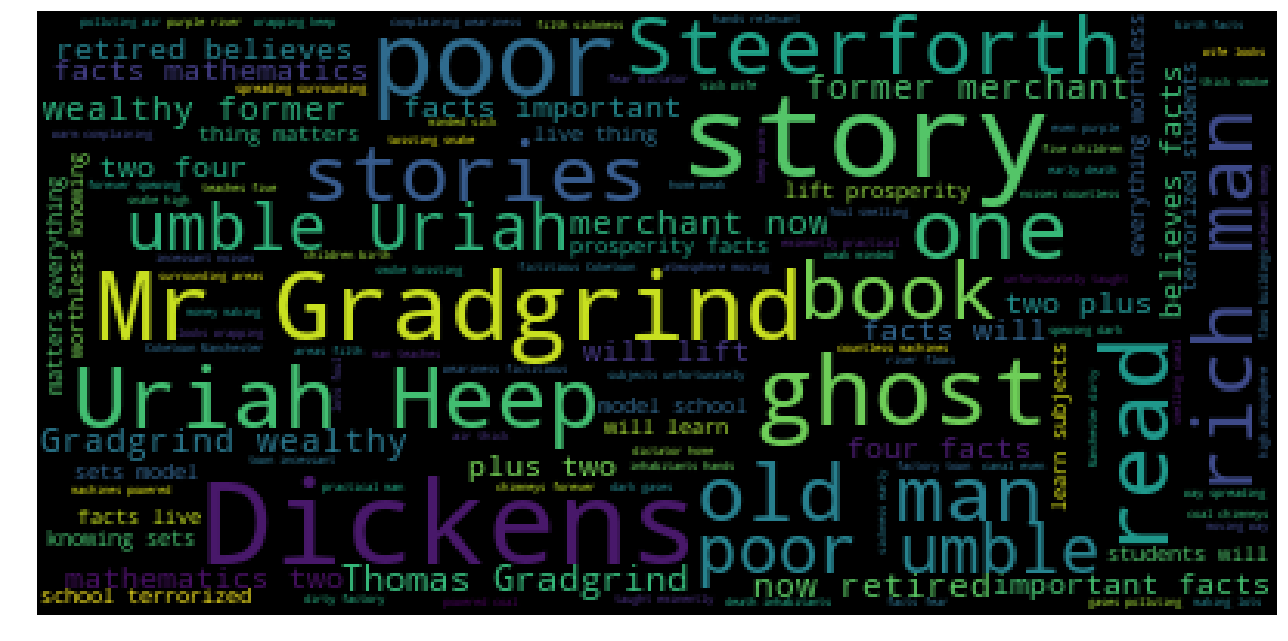

In [474]:
word_neg = WordCloud(max_font_size =40).generate(cdr_neg)
plt.figure(figsize=(20,10),dpi= 80)
plt.imshow(word_neg,interpolation='none',aspect ='auto')
plt.axis('off')
plt.show()


## Wordcloud for Positive reviews by users on works of Charles Dickens 

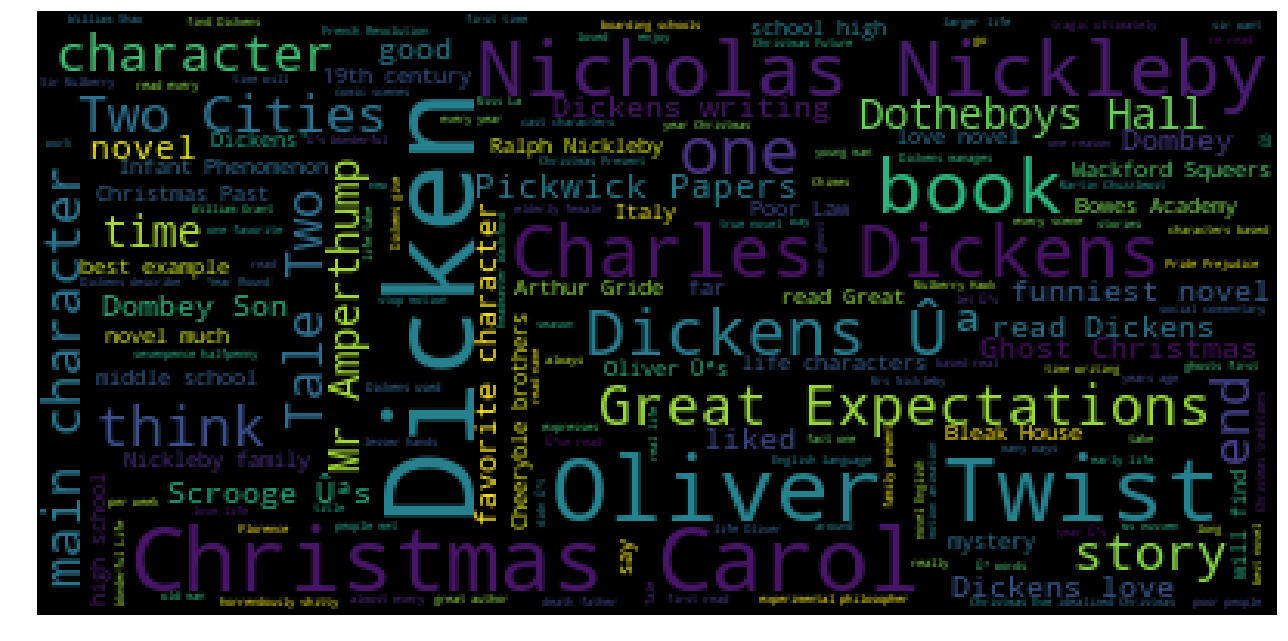

In [475]:
word_pos = WordCloud(max_font_size =40).generate(cdr_pos)
plt.figure(figsize=(20,10),dpi = 80)
plt.imshow(word_pos,interpolation='none',aspect ='auto')
plt.axis('off')
plt.show()

## Wordcloud for Neutral reviews by users on works of Charles Dickens

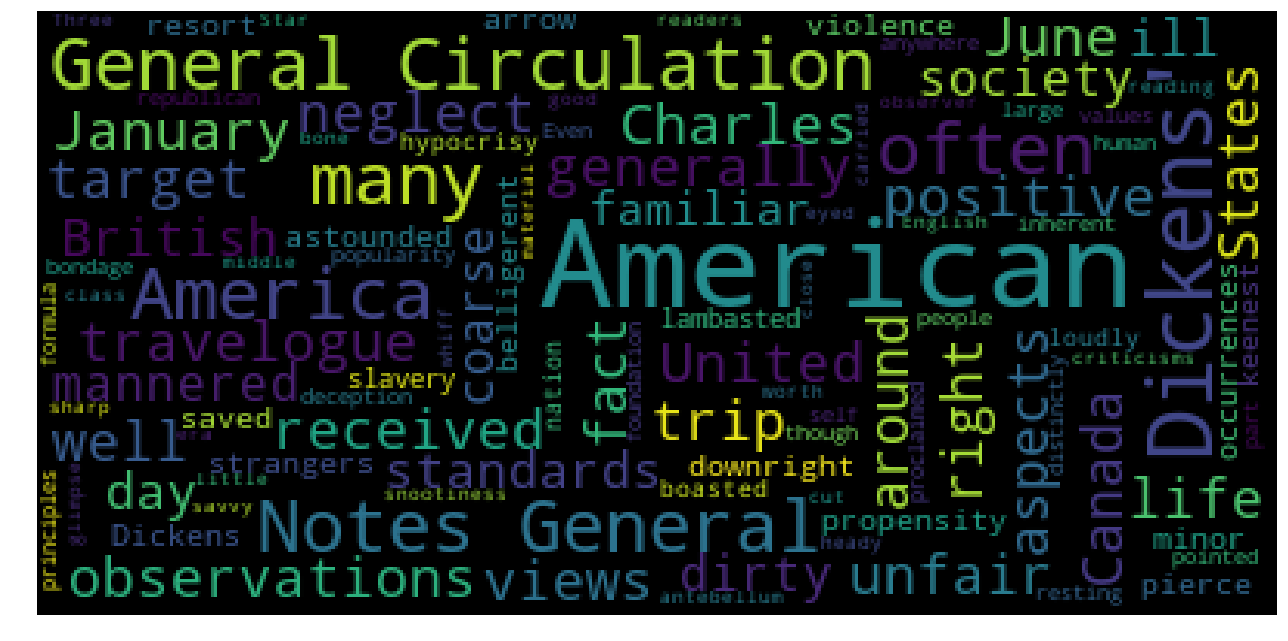

In [476]:
word_neu = WordCloud(max_font_size =40).generate(cdr_neu)
plt.figure(figsize=(20,10),dpi = 80)
plt.imshow(word_neu,interpolation='none',aspect='auto')
plt.axis('off')
plt.show()

# Analsysis of the works by J.K.Rowling 



In [477]:
uniq_a[(uniq_a.author=='J.K. Rowling') & (uniq_a.reviewerName =='Leah') ]

,bookID,title,author,review,rating,reviewerName,rev_lang,sentiment,feel
22700,47523,"Harry Potter Boxed Set (Harry Potter, #1-4)",J.K. Rowling,This was not a series of books for me. This wa...,4.66,Leah,en,-0.2887,Negative
30546,99298,"The Harry Potter Collection 1-4 (Harry Potter,...",J.K. Rowling,This was not a series of books for me. This wa...,4.66,Leah,en,-0.2887,Negative
267425,107894,"The Harry Potter Collection (Harry Potter, #1-4)",J.K. Rowling,This was not a series of books for me. This wa...,4.66,Leah,en,-0.2887,Negative
574994,318578,"Harry Potter, coffret 4 volumes (Harry Potter,...",J.K. Rowling,This was not a series of books for me. This wa...,4.66,Leah,en,-0.2887,Negative


## Seems like the works of JK Rowling were not much appreciated by Leah . 

In [478]:
jkr_pos = uniq_a[(uniq_a.author=='J.K. Rowling') & (uniq_a.feel =='Positive') ]
jkr_neg = uniq_a[(uniq_a.author=='J.K. Rowling')& (uniq_a.feel =='Negative')]
jkr_neu = uniq_a[(uniq_a.author=='J.K. Rowling') &(uniq_a.feel =='Neutral')]

In [2]:
len(jkr_neg)

NameError: name 'jkr_neg' is not defined

In [484]:
len(jkr_pos)

34

In [481]:
pos_txt = ""
for i in jkr_pos.review:
    pos_txt+=i
pos_txt

'I\'m going to keep this brief since there isn\'t much to say that hasn\'t already been said. *clears throat*I think the reason I waited so long to read this series is because I just couldn\'t imagine myself enjoying reading about an eleven-year-old boy and his adventures at a school of wizardry. I thought it would be too juvenile for my taste. I was wrong, of course.I can honestly say that I loved every minute of this. It\'s a spectacular little romp with funny, courageous, and endearing characters that you can\'t help but love.It has talking chess pieces, singing hats, a giant three-headed dog named Fluffy, a hilarious giant with a dragon fetish, a master wizard that\'s just a little bit crazy, mail carrier owls, goblins running a bank, unicorns, centaurs(!), trolls . . . and probably much more that I\'m forgetting. And then there\'s the lead characters: Hermione, the young scholar who starts out prim and up-tight but soon becomes a true friend; Ron, the boy who has little money but 

### Positive cloud for Harry Potter books 

In [485]:
jk_p_c = WordCloud(max_font_size =40).generate(pos_txt)
plt.figure(figsize=(20,10),dpi = 800)
plt.imshow(jk_p_c,interpolation='none',aspect='auto')
plt.axis('off')
plt.show()

### negative reviews for the harry Potter books 

In [486]:
neg_txt = ""
for i in jkr_neg.review:
    neg_txt+=i

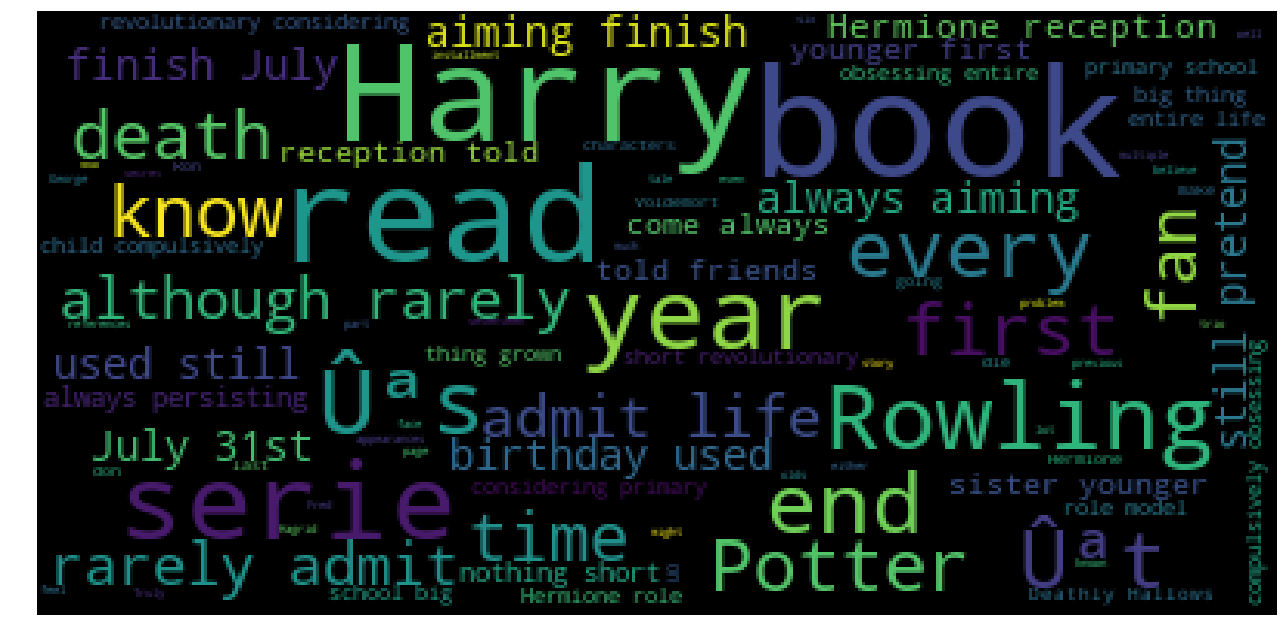

In [487]:
jk_n_c = WordCloud(max_font_size =50).generate(neg_txt)
plt.figure(figsize=(20,10),dpi = 80)
plt.imshow(jk_n_c,interpolation='none',aspect='auto')
plt.axis('off')
plt.show()
# plt.savefig('jk_n_c.png', bbox_inches='tight')

## The main problem is that some ultra popular books have no neutral reviews at all , It is extreme . 

## some other authors we will be exploring here . 

In [431]:
len(uniq_a.author.unique())
## There are 39798 different authors in the test 

39798

In [430]:
len(uniq_a)

103681

In [351]:
datang.loc[datang.author=="George Orwell",['author','title','rating']]

,author,title,rating
3,George Orwell,Why I Write,4.04
247,George Orwell,Essays (Everyman's Library Classics),4.47
248,George Orwell,"As I Please: 1943-1945 (The Collected Essays, ...",4.42
250,George Orwell,Down And Out In Paris And London,4.10
251,George Orwell,A Collection of Essays,4.30
252,George Orwell,Nineteen Eighty-Four,4.14
1264,George Orwell,Nineteen Eighty-Four,4.14
1265,George Orwell,1984,4.14
1268,George Orwell,1984,4.14
1959,George Orwell,In Front of Your Nose: 1945-1950 (The Collecte...,4.41


### some discrepancy of data while copying to the text files was sorted by dropping duplicate values in the title and rating . 

In [442]:
uniq_a.columns

Index(['bookID', 'title', 'author', 'review', 'rating', 'reviewerName',
       'rev_lang', 'sentiment', 'feel'],
      dtype='object')

In [443]:
uniq_a =(datang.drop_duplicates(subset=['title','author','rating','reviewerName'],keep='first'))

In [444]:
(uniq_a.loc[datang.author=="J.K. Rowling",['title','author','rating']])


,title,author,rating
0,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.44
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.54
2,"The Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73
16,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73
947,Harry Potter and the Philosopher's Stone (Harr...,J.K. Rowling,4.44
1173,"¾ááÁÛ_Ü__ãÄÎÝ (Òöö©¾_¢ä_, #6)",J.K. Rowling,4.54
2044,Harry Potter Y La Piedra Filosofal (Harry Pott...,J.K. Rowling,4.44
2045,Harry Potter y la piedra filosofal (Harry Pott...,J.K. Rowling,4.44
7781,Harrius Potter et Philosophi Lapis (Harry Pott...,J.K. Rowling,4.44
8211,Harry Potter ÌÊ l'Ì©cole des sorciers (Harry P...,J.K. Rowling,4.44


In [445]:
uniq_a.duplicated().unique()

array([False], dtype=bool)

In [446]:
go_pos = uniq_a[(uniq_a.author=="George Orwell") &(uniq_a.feel=="Positive")]
go_neg = uniq_a[(uniq_a.author=="George Orwell") &(uniq_a.feel=="Negative")]
go_neu = uniq_a[(uniq_a.author=="George Orwell") &(uniq_a.feel=="Neutral")]

### Preparing the text review files for the works of George Orwell 

In [492]:
go_posr = ""
for i in go_pos.review:
    go_posr+=i


In [493]:
go_negr=""
for i in go_neg.review:
    go_negr+=i

In [494]:
go_neur=""
for i in go_neu.review:
    go_neur+=i

### This wordcloud is for the positive reviews on George Orwells work 

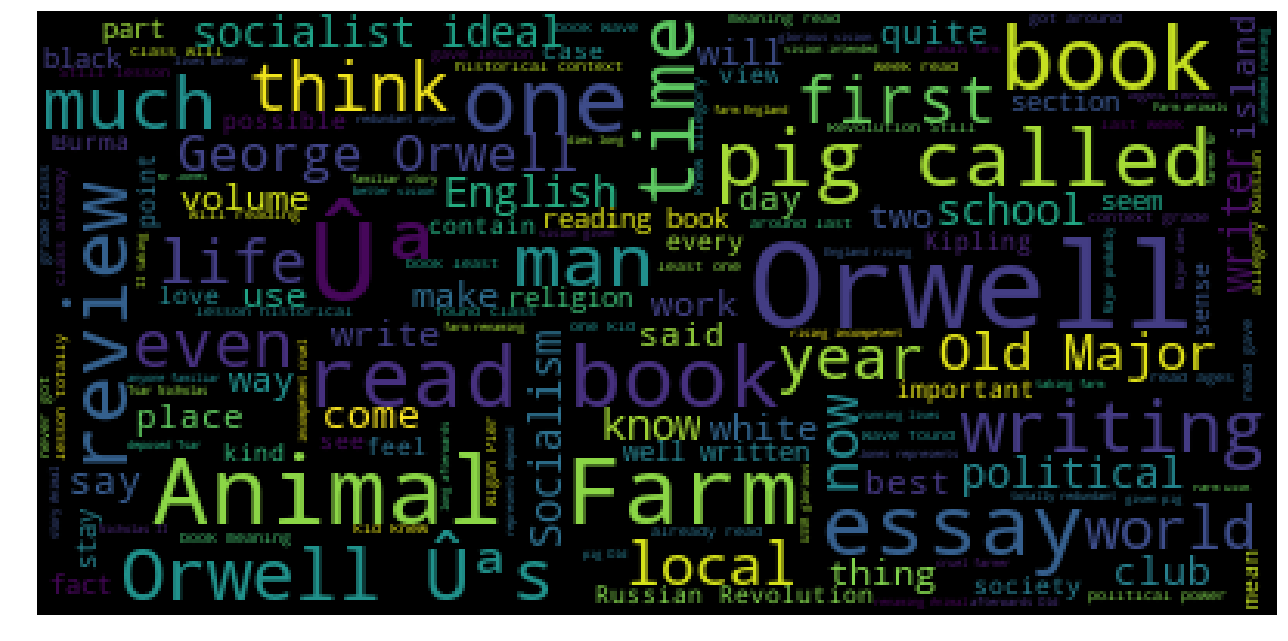

In [495]:
gop_c = WordCloud(max_font_size=40).generate(go_posr)
plt.figure(figsize=(20,10),dpi = 80)
plt.imshow(gop_c,interpolation="none",aspect='auto')
plt.axis('off')
plt.show()

## This wordcloud is for the negative reviews on George Orwells work 


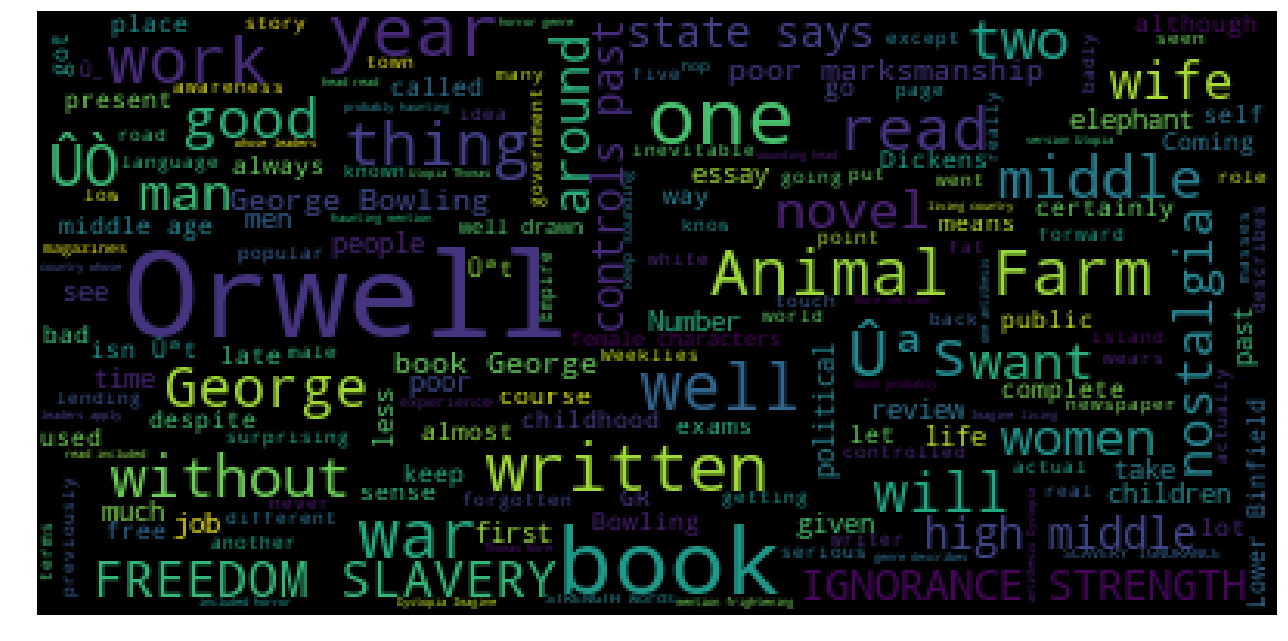

In [501]:
gon_c = WordCloud(max_font_size=40).generate(go_negr)
plt.figure(figsize=(20,10),dpi =80)
plt.imshow(gon_c,interpolation="nearest",aspect='auto')
plt.axis('off')
plt.show()


## This wordcloud is for the neutral reviews on George Orwells work

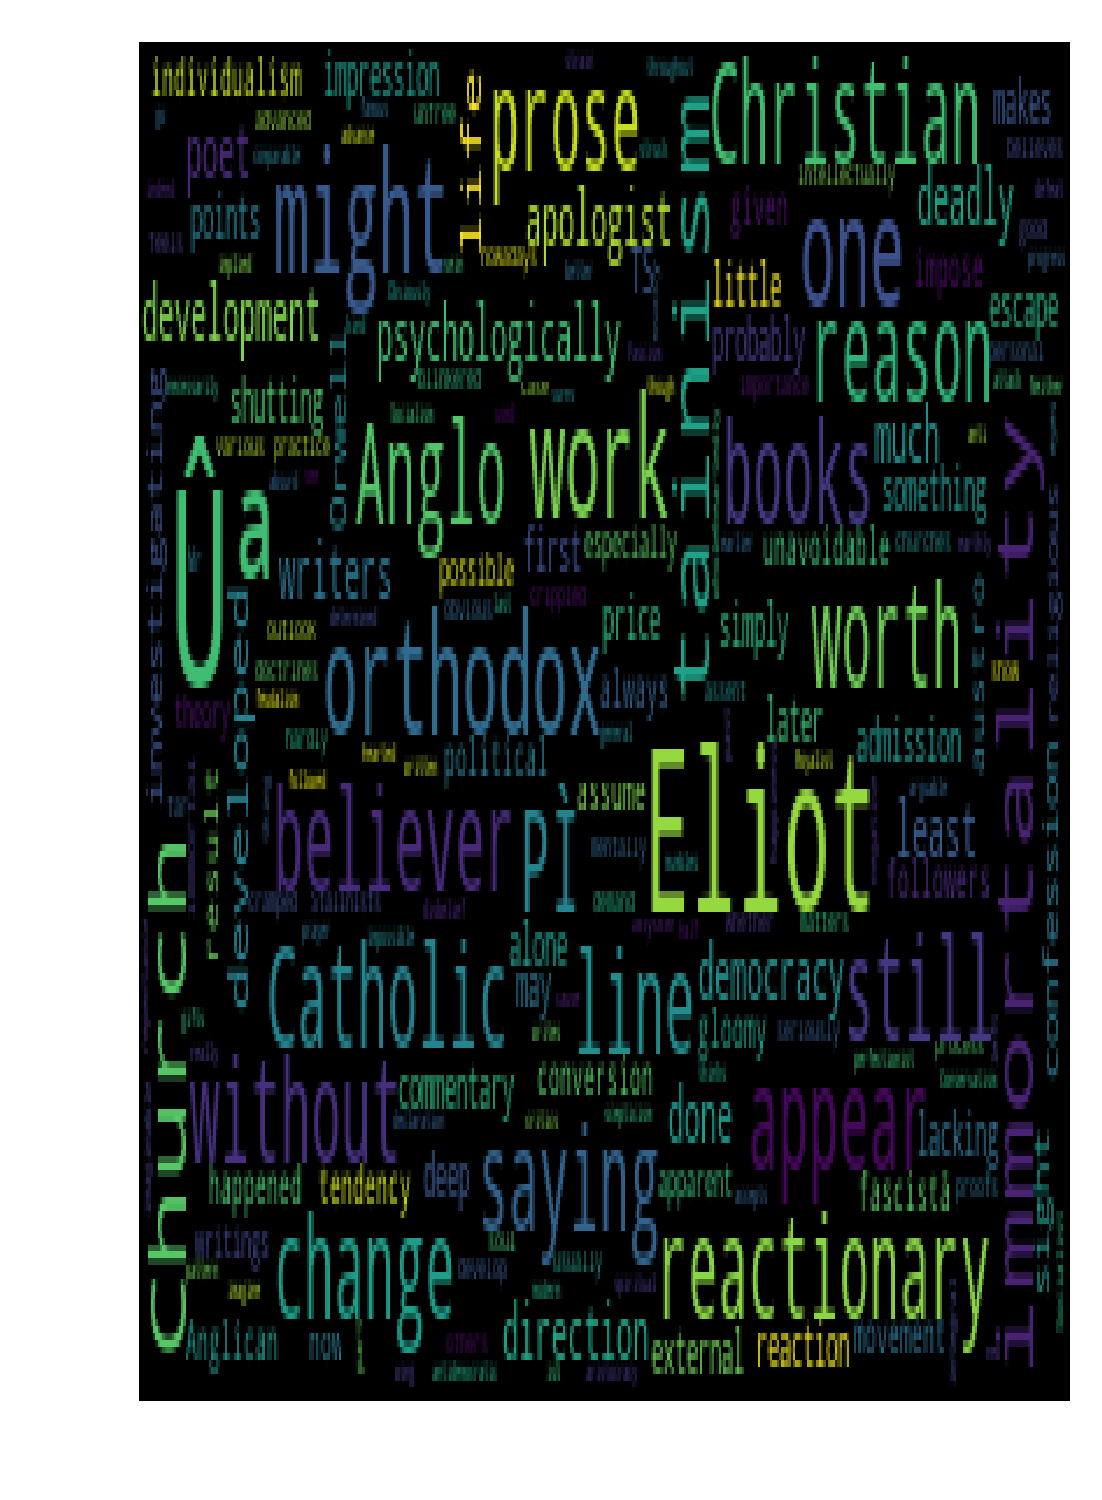

In [513]:
gou_c = WordCloud(max_font_size=40).generate(go_neur)
plt.figure(figsize=(20,10),dpi=80)
plt.imshow(gou_c,interpolation="nearest",aspect='auto')
plt.axis('off')
plt.show()
plt.savefig('go_neu.pdf',dpi=300)

## Top 10  reviewed authors , surprisingly excludes our other considered authors . 

In [517]:
uniq_a.author.value_counts().head(10)

Anonymous              385
William Shakespeare    283
Stephen King           215
R.L. Stine             182
C.S. Lewis             152
Agatha Christie        146
Georges Simenon        142
Isaac Asimov           135
Mark Twain             132
Nora Roberts           131
Name: author, dtype: int64

In [8]:
import pandas as pd 
import numpy as np 

## Doing Naive Bayes analysis on the  labeled dataset that we built previously

In [315]:
pq = pd.read_csv("/Users/sharathg/Desktop/fglndflg/feel_data")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,1,2,3,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [316]:
len(pq)

581214

In [317]:
pq =(pq.drop_duplicates(subset=['title','author','rating','reviewerName'],keep='first'))

In [12]:
len(pq)

103695

In [14]:
pq.feel.unique()

array(['Positive', 'Negative', 'Neutral', nan], dtype=object)

In [318]:
pq_nb= pq.loc[pq.feel!='Neutral']

In [319]:
pq_nb.feel.unique()

array(['Positive', 'Negative', nan], dtype=object)

In [320]:
pq_nb= pq.loc[(pq.feel!="Neutral") &(pq.feel!='')]

In [321]:
len(pq_nb[pq_nb['feel']=='Positive']) +len(pq_nb[pq_nb['feel']=='False'])

81327

In [322]:
len(pq_nb.feel)

102433

In [ ]:
pq.loc[(pq.feel!="Neutral")

In [37]:
pq_nb.isnull().sum().sum()

24

In [323]:
pq_nb =pq_nb.dropna()

In [324]:
pq_nb.isnull().sum().sum()

0

### Tokenizing and removing stop words for analysis 

In [217]:
pq_nb_rev = pq_nb['review']
pq_nb_feel=pq_nb['feel']

In [218]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [219]:
ReviewWords = []

In [ ]:
for i in pq_nb_rev:
    #Tokenizing reviews 
    tokens = word_tokenize(i)
    
    #converting to lower case 
    tokens = [s.lower() for s in tokens]
    
    ##Removing punctutaion from words
    table = dict.fromkeys(range(32))
    stripped = [w.translate(table) for w in tokens]
    
    ##REmoving non alphabetic tokens 
    words = [word for word in stripped if word.isalpha()]
    
    ## removing the stop words from wnglish language
    stop_words =set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    ReviewWords.append(words)
    
    

In [ ]:
df = pd.DataFrame({'review':ReviewWords,
                   'feel':pq_nb_feel })

len(pq_nb_feel)

In [ ]:
f  ='datanb.csv'

In [ ]:
df.to_csv(f,encoding ='utf-8')

In [ ]:
type(df)

## Making the test and train data set for learning

In [325]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [326]:
pq_nb_rev = df['review']
pq_nb_feel= df['feel']


In [ ]:
# pq_nb_p= pq_nb.loc[pq_nb.feel=='Positive']
# pq_nb_n= pq_nb.loc[pq_nb.feel=='Negative']

In [303]:
pq_nb_feel.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: feel, dtype: object

In [327]:
rev_train, rev_test = train_test_split(pq_nb_rev,test_size=0.2 )

In [328]:
feel_train,feel_test = train_test_split(pq_nb_feel,test_size = 0.2 )


## Starting the Naive Bayes Classifier on the labeled data set created previously . 

In [ ]:
# vectorizer = CountVectorizer(stop_words='english')
# train_features = vectorizer.fit_transform([r[0] for r in reviews])
# test_features = vectorizer.transform([r[0] for r in test])


In [ ]:
df.head()

In [329]:
len(rev_test)

20486

In [330]:
len(rev_train)

81942

In [ ]:
df.review[0:1]

In [ ]:
df.review =[]
for i in df.review:

In [331]:
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [332]:
# Building the pipeline to perform the necessary steps to build the model. 

In [333]:
text_clf_nb = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB(alpha=1.0, class_prior=None)),
                        ])

# Fitting the pipeline to the train data 

In [337]:
text_clf_nb = text_clf_nb.fit( rev_train,feel_train)


AttributeError: 'list' object has no attribute 'lower'

### Predicting the test data set using the trained model

In [335]:

nb_predict =text_clf_nb.predict(rev_test)

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [80]:
## Calculataing the accuracy 
accuracy = np.mean(nb_predict==feel_test)
accuracy 

0.78892902469979498

### Trying to improve the Naive bayes model ,using the gridsearch .

In [92]:
##Creating the parameter dictionary to test 
param_nb = {
                'vect__ngram_range': [(1, 1), (1, 2),(1,3)],
                'tfidf__use_idf': (True, False),
                 'clf__alpha': (1e-2, 1e-3)
            }

## Pipeline for the model 

In [93]:
text_clf_nb_grid = Pipeline([('vect', CountVectorizer()),
                                 ('tfidf', TfidfTransformer()),
                                 ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)),
                        ])

In [94]:
gs_clf_nb = GridSearchCV(text_clf_nb_grid, param_nb, n_jobs=-1)

In [95]:
gs_clf_nb = gs_clf_nb.fit(rev_train, feel_train)


KeyboardInterrupt: 

In [87]:
gs_nb_predict = gs_clf_nb.predict(rev_test)

In [89]:
## CAlculating the accuracy of the grdisearch model here 
gs_nb_Acc = np.mean(gs_nb_predict==feel_test)
gs_nb_Acc

0.78829444498682022

In [91]:
(accuracy-gs_nb_Acc)*100

0.063457971297475879

In [ ]:
## The accuracy has gone down, by  0.06 % after using the gridsearch . 